Earliest timestamp: 2012-01-01 00:00:00
Latest timestamp: 2014-12-31 23:00:00
Train timestamps: 23650
Test timestamps: 2608


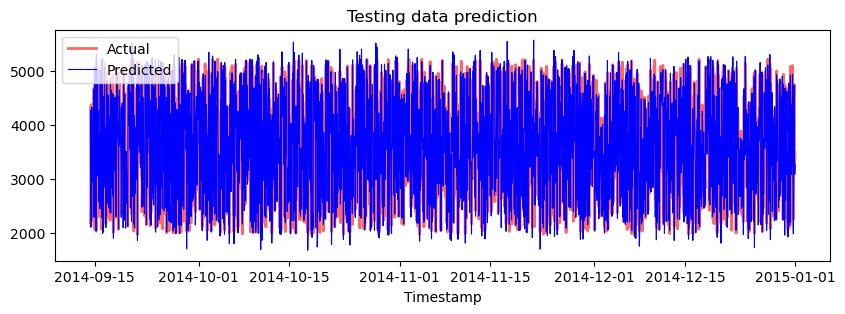

MAPE for training data: 3.89 %


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Define MAPE function
def mape(y_pred, y_true):
    return np.mean(np.abs((y_true - y_pred) / y_true))

# Load and prepare the data
energy = pd.read_csv('energy.csv', parse_dates=['timestamp'], index_col='timestamp')
energy = energy.sort_index()

# Show data range
print("Earliest timestamp:", energy.index.min())
print("Latest timestamp:", energy.index.max())

# Target column and timestep
target_column = 'load'
timesteps = 24

# Define valid date range based on data (90% train, 10% test)
full_index = energy.index
start_date = full_index.min()
split_point = int(len(full_index) * 0.9)
test_start_dt = full_index[split_point]

train_data = energy[(energy.index < test_start_dt) & (energy.index >= start_date)]
test_data = energy[energy.index >= test_start_dt]

train_timestamps = train_data.index[timesteps - 1:]
test_timestamps = test_data.index[timesteps - 1:]

# Sanity check
print("Train timestamps:", len(train_timestamps))
print("Test timestamps:", len(test_timestamps))

if len(train_timestamps) == 0 or len(test_timestamps) == 0:
    raise ValueError("Empty timestamp range. Try different split or reduce timesteps.")

# Scale
scaler = MinMaxScaler()
all_y = energy[[target_column]].values
scaler.fit(all_y)

# Simulated predictions (replace with actual model outputs)
y_train = np.random.rand(len(train_timestamps), 1)
y_test = np.random.rand(len(test_timestamps), 1)
y_train_pred = y_train + np.random.normal(0, 0.05, size=y_train.shape)
y_test_pred = y_test + np.random.normal(0, 0.05, size=y_test.shape)

# Inverse scale
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

# Plot test data predictions
plt.figure(figsize=(10, 3))
plt.plot(test_timestamps, y_test, color='red', linewidth=2.0, alpha=0.6)
plt.plot(test_timestamps, y_test_pred, color='blue', linewidth=0.8)
plt.legend(['Actual', 'Predicted'])
plt.xlabel('Timestamp')
plt.title('Testing data prediction')
plt.show()

# Print MAPE
print('MAPE for training data:', round(mape(y_train_pred, y_train) * 100, 2), '%')